In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
data=pd.read_csv(r'C:\Users\ilyat\PycharmProjects\tpu-8e21-ai-basis\Tkachenko\data\raw\test_scores.csv')
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   object 
 1   school_setting   1984 non-null   object 
 2   school_type      1984 non-null   object 
 3   classroom        1984 non-null   object 
 4   teaching_method  1984 non-null   object 
 5   n_student        1984 non-null   float64
 6   student_id       1984 non-null   object 
 7   gender           1984 non-null   object 
 8   lunch            1984 non-null   object 
 9   pretest          1984 non-null   float64
 10  posttest         1984 non-null   float64
dtypes: float64(3), object(8)
memory usage: 170.6+ KB


In [3]:
data.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [4]:
data.duplicated().sum()

0

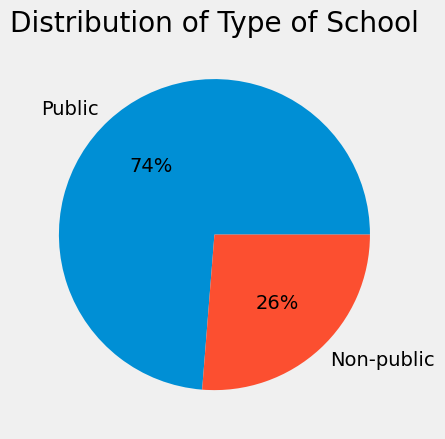

In [5]:
sch_type = data['school_type'].value_counts()

plt.pie(sch_type, labels=sch_type.index, autopct='%.0f%%')
plt.title("Distribution of Type of School")
plt.show()

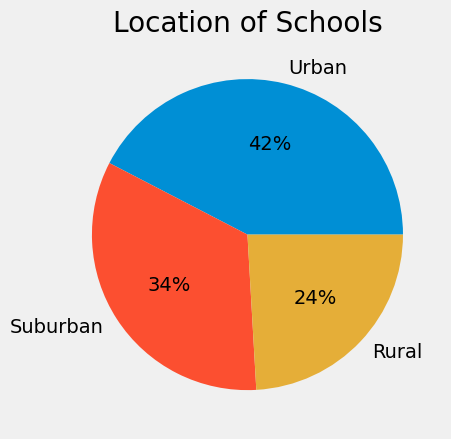

In [6]:
sch_set = data['school_setting'].value_counts()

plt.pie(sch_set, labels=sch_set.index, autopct='%.0f%%')
plt.title("Location of Schools")
plt.show()

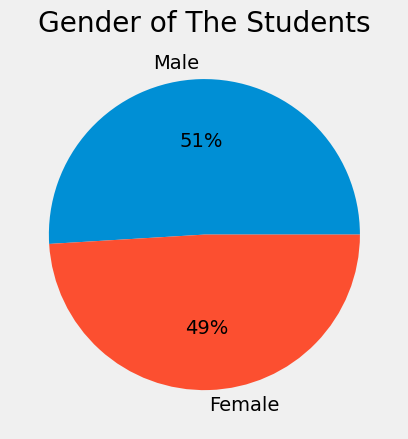

In [7]:
gender = data['gender'].value_counts()

plt.pie(gender, labels=gender.index, autopct='%.00f%%')
plt.title("Gender of The Students")
plt.show()

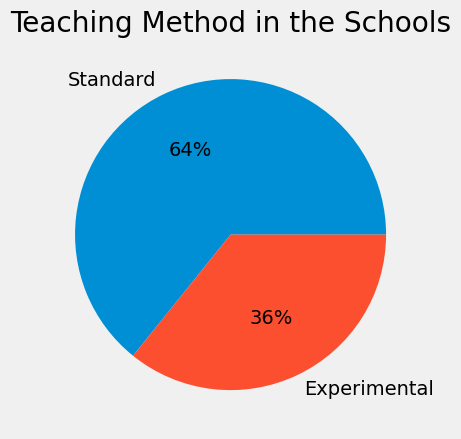

In [8]:
teach = data['teaching_method'].value_counts()

plt.pie(teach, labels=teach.index, autopct='%.0f%%')
plt.title("Teaching Method in the Schools")
plt.show()

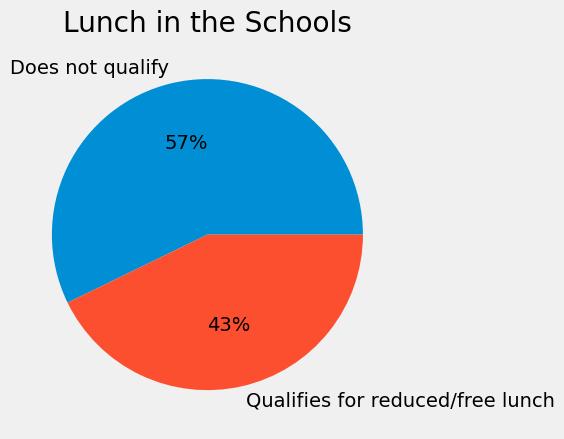

In [9]:
lunch = data['lunch'].value_counts()

plt.pie(lunch, labels=lunch.index, autopct='%.0f%%')
plt.title("Lunch in the Schools")
plt.show()

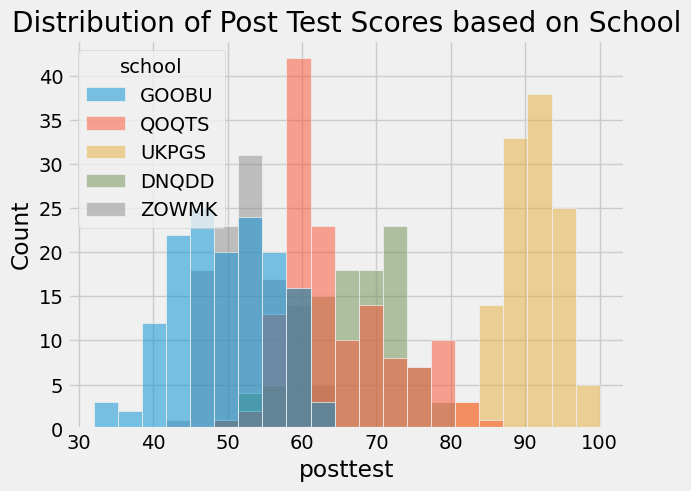

In [10]:
sns.histplot(x=data['posttest'], data=data, hue=data['school'], 
             hue_order=data['school'].value_counts().iloc[:5].index)

plt.title("Distribution of Post Test Scores based on School")
plt.show()

In [ ]:
из данного графика видно, что учащаеся в в школе UKPGS набрали за послетестирование  больше баллов, чем учащаеся из других школ

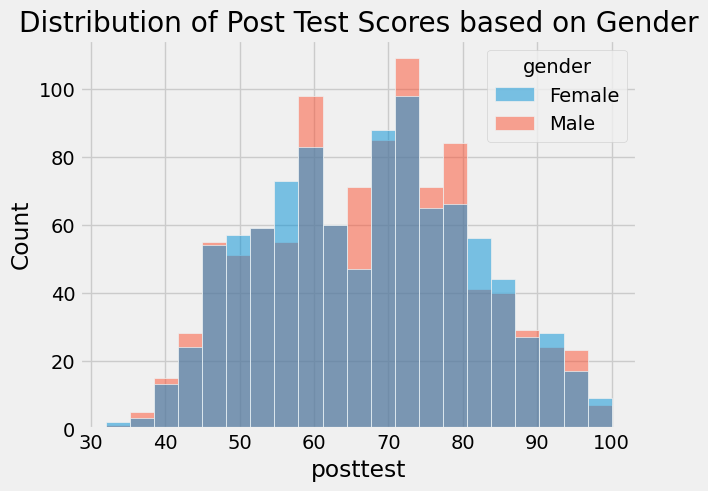

In [12]:
sns.histplot(x=data['posttest'], data=data, hue=data['gender'])

plt.title("Distribution of Post Test Scores based on Gender")
plt.show()

In [ ]:
гендер учащихся незначительно влияет на результаты тестирования

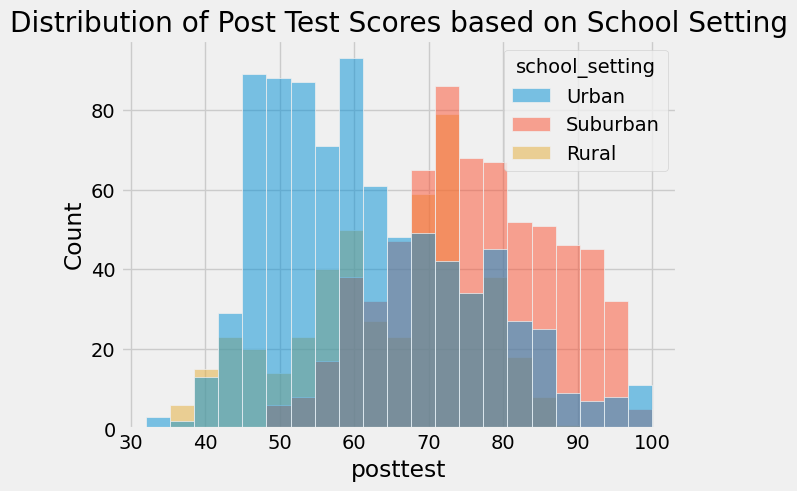

In [13]:
sns.histplot(x=data['posttest'], data=data, hue=data['school_setting'])

plt.title("Distribution of Post Test Scores based on School Setting")
plt.show()

In [ ]:
учащаеся в пригородных школах набирают гораздо более высокие оценки, нежели в городах и немного выше чем в деревнях; возможно там люди больше сосредоточены на обучении своих детей 

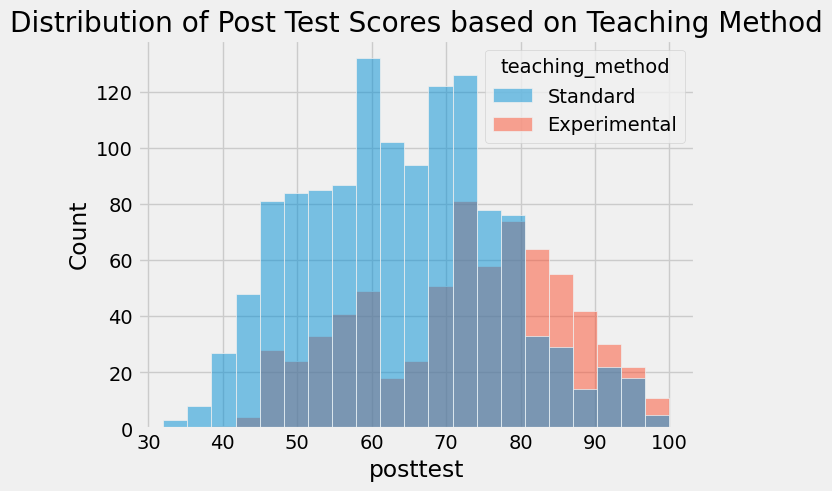

In [14]:
sns.histplot(x=data['posttest'], data=data, hue=data['teaching_method'])

plt.title("Distribution of Post Test Scores based on Teaching Method")
plt.show()

In [ ]:
эксперементальный метод дает более качественное обучение, возможно за счет индивидуального подхода к учащимся

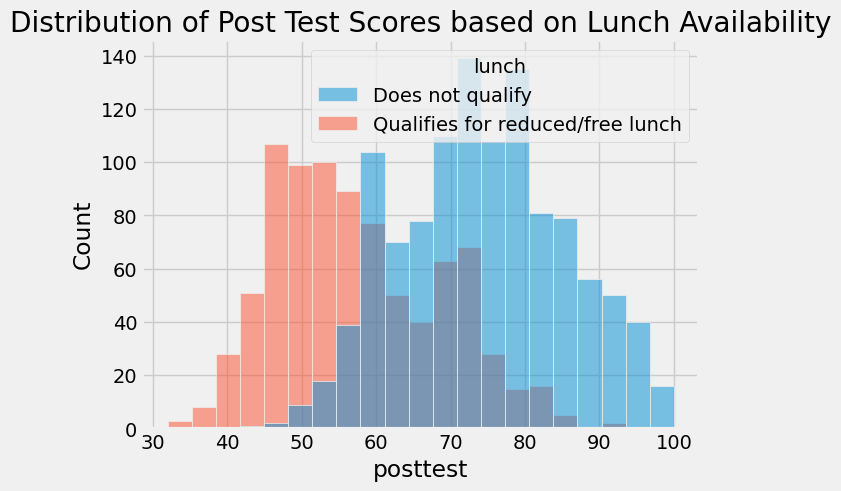

In [15]:
sns.histplot(x=data['posttest'], data=data, hue=data['lunch'])

plt.title("Distribution of Post Test Scores based on Lunch Availability")
plt.show()

In [ ]:
кто не работает, тот ест; цитата лсп - шест

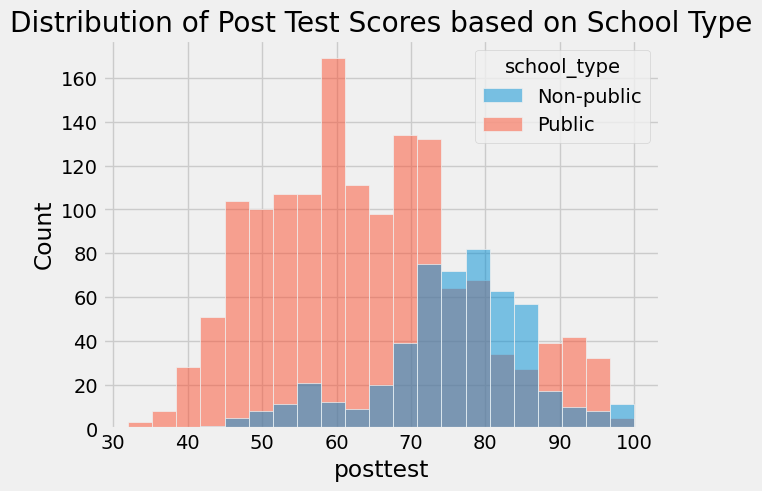

In [22]:
sns.histplot(x=data['posttest'], data=data, hue=data['school_type'])

plt.title("Distribution of Post Test Scores based on School Type")
plt.show()

In [ ]:
учащиеся негосударственных школ получают баллы выше

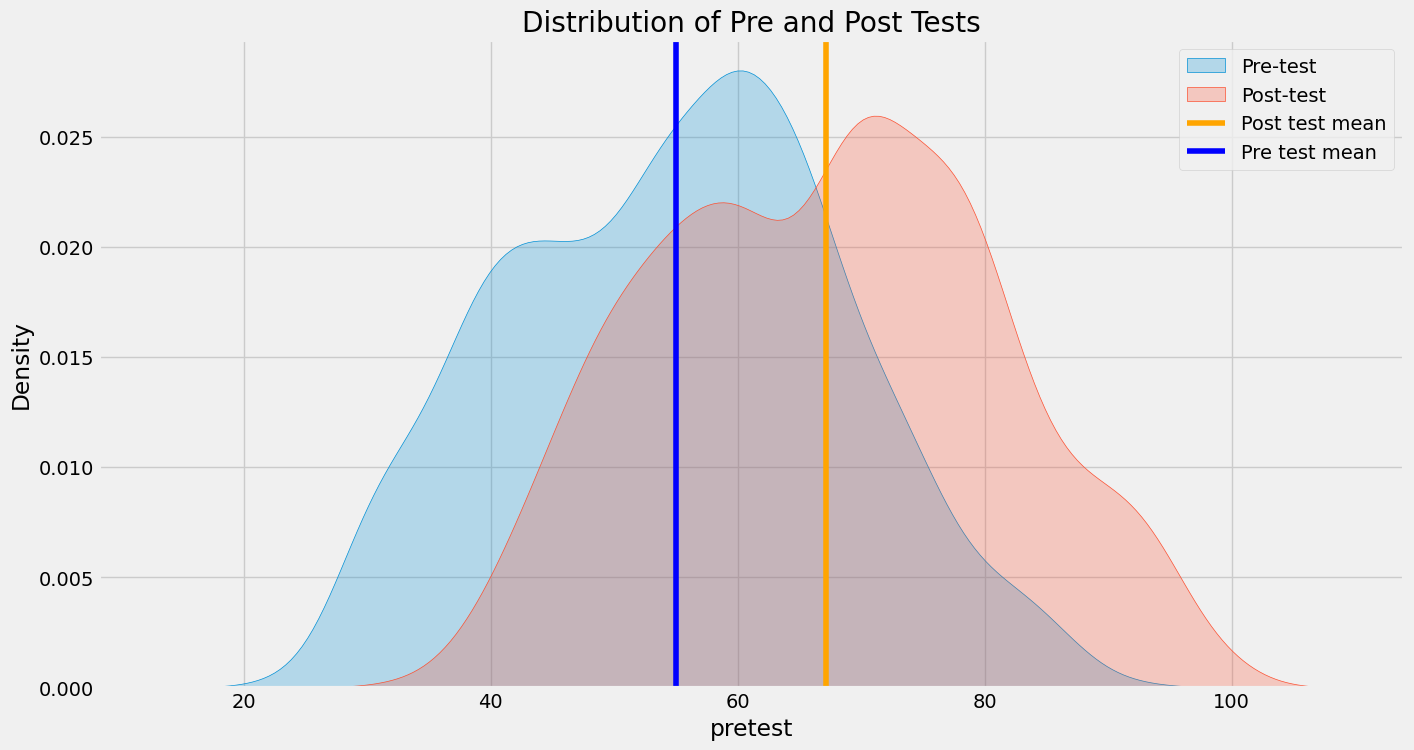

In [21]:
post_mean = data['posttest'].describe()['mean']
pre_mean = data['pretest'].describe()['mean']

plt.figure(figsize=(15,8))
plt.title('Distribution of Pre and Post Tests')
sns.kdeplot(data=data['pretest'], shade=True, label='Pre-test')
sns.kdeplot(data=data['posttest'], shade=True, label='Post-test')
plt.axvline(x=post_mean, linestyle='-', color='orange', label='Post test mean')
plt.axvline(x=pre_mean, linestyle='-', color ='blue', label='Pre test mean')
plt.legend()
plt.show()

In [ ]:
баллы после тестирования в среднем выше, чем баллы до тестирования, и распределение между ними довольно схожее

In [36]:
data['school_setting'].replace(('Urban', 'Suburban', 'Rural'), (0, 1, 2), inplace=True)
data['teaching_method'].replace(('Standard', 'Experimental'), (0, 1), inplace=True)
data['school_type'].replace(('Public', 'Non-public'), (0, 1), inplace=True)
data['gender'].replace(('Female', 'Male'), (0, 1), inplace=True)
data['lunch'].replace(('Does not qualify', 'Qualifies for reduced/free lunch'), (0, 1), inplace=True)

data

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,0,1,6OL,0,20.0,2FHT3,0,0,62.0,72.0
1,ANKYI,0,1,6OL,0,20.0,3JIVH,0,0,66.0,79.0
2,ANKYI,0,1,6OL,0,20.0,3XOWE,1,0,64.0,76.0
3,ANKYI,0,1,6OL,0,20.0,556O0,0,0,61.0,77.0
4,ANKYI,0,1,6OL,0,20.0,74LOE,1,0,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
1979,ZOWMK,0,0,ZBH,0,30.0,S4I5S,1,1,39.0,50.0
1980,ZOWMK,0,0,ZBH,0,30.0,T8LSK,0,0,39.0,55.0
1981,ZOWMK,0,0,ZBH,0,30.0,VNP26,0,1,38.0,46.0
1982,ZOWMK,0,0,ZBH,0,30.0,YUEIH,1,1,46.0,53.0


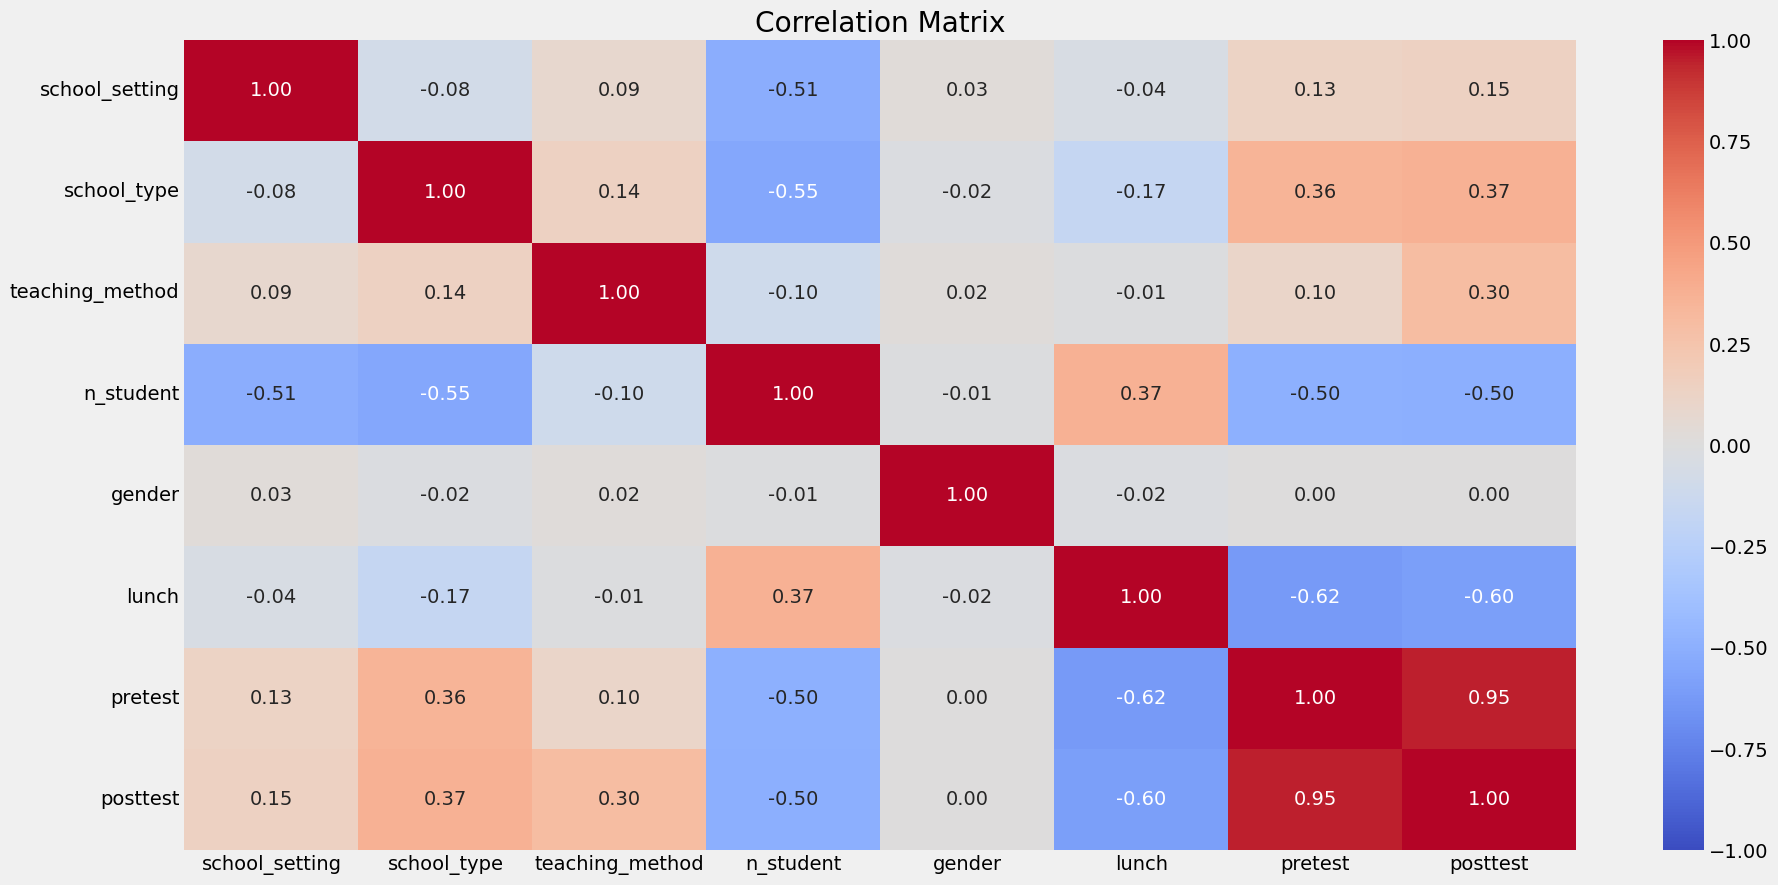

In [37]:
num_data = data.select_dtypes('number')
corr = num_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
Выводы
Чтобы хорошо сдать итоговое тестирование необходимо:
-учиться в школе UKPGS
-учиться в пригородной школе
-учиться по экспериментальному методу обучения
-не кушать
-учиться в негосударственной школе